# Benchmarking

ATOM tries to predict the paleo climate in time slices of million years. The atmospheric and the hydrospheric circulations are computed based on the laminar and steady Navier-Stokes equations with additional transport equations for the water vapour, cloud water, cloud ice resulting in precipitation predictions and for the salinity transport. The ocean surface water velocity distribution results from the surface wind velocity distribution of the atmospheric circulations. 

The code is written for laptop usage, which makes approximations necessary, one of which is the assumption of a laminar and steady flow environment. The application of the 4th order Runge-Kutta solution scheme including immersed boundary conditions and the assumption of a sperical orthogonal coordinate system makes the code fast.

ATOM's main fluid dynamical features, Atmosphere and Hydrosphere, are permanently in development. Changements are uploaded to GitHub.

This code allows the vizualisation of the results for time slices the user prescribes. For the modern world the results are comparable to NASA measurements.


In [1]:
import sys
import matplotlib.pyplot as plt
import os.path
import numpy as np
import shutil
import pyatom

from mpl_toolkits.basemap import Basemap
from pyatom import Model, Atmosphere, Hydrosphere

from numpy import linspace
from numpy import meshgrid

model = Model()

# for "a_h = atm" only the atmospheric circulation used:
a_h = 'atmosphere'
#a_h = 'hydrosphere'     # the transfer file with the extension *.vw from the corresponding atm-run must be available!
#a_h = 'atmosphere and hydrosphere'

# for "rebuild = True" old output files are deleted:
rebuild = False

# applied configuration files for atmosphere and/or hydrosphere are named:
config_xml_atm = 'config_atm.xml'
config_xml_hyd = 'config_hyd.xml'

# time slices in Ma to be compared are named:
time_slice = [ 0, 10 ]
#time_slice = [ 0 ]
#time_slice = [ 10 ]




# applied time slices
for t_s in time_slice:
    print 'time slice in Ma = ', t_s
            
    # naming the output paths
    output_path = 'output-%s/' % t_s
    print 'output path = ', output_path
            
    # deleting old output paths in case "rebuild = True"
    if rebuild:
        shutil.rmtree ( output_path )

    if a_h == 'atmosphere':
        # runing the atmosphere model
        print 'run model: time slice in Ma = ', t_s, '   output path = ', output_path, '   configuration file = ', config_xml_atm
        model.run_atm( t_s, output_path, config_xml_atm )
    elif a_h == 'hydrosphere':        
        # runing the hydrosphere model
        print 'run model: time slice in Ma = ', t_s, '   output path = ', output_path, '   configuration file = ', config_xml_hyd
        model.run_hyd( t_s, output_path, config_xml_hyd )
    elif a_h == 'atmosphere and hydrosphere':        
        # runing the atmosphere model
        print 'run model: time slice in Ma = ', t_s, '   output path = ', output_path, '   configuration file = ', config_xml_atm
        model.run_atm( t_s, output_path, config_xml_atm )
        # runing the hydrosphere model
        print 'run model: time slice in Ma = ', t_s, '   output path = ', output_path, '   configuration file = ', config_xml_hyd
        model.run_hyd( t_s, output_path, config_xml_hyd )

print 'end of benchmark session running %s' % a_h


time slice in Ma =  0
output path =  output-0/
run model: time slice in Ma =  0    output path =  output-0/    configuration file =  config_hyd.xml
0
output-0/
config_hyd.xml

   Input is being read from output-0

   Output is being written to output-0
   Ma = 0
   bathymetry_path = ../data/Paleotopography_bathymetry/Golonka_rev210
   bathymetry_filepath = ../data/Paleotopography_bathymetry/Golonka_rev210/0Ma_Golonka.xyz




***** Hydrosphere General Circulation Model ( OGCM ) applied to laminar flow
***** program for the computation of geo-atmospherical circulating flows in a spherical shell
***** finite difference scheme for the solution of the 3D Navier-Stokes equations
***** with 1 additional transport equations to describe the salinity
***** 4th order Runge-Kutta scheme to solve 2nd order differential equations inside an inner iterational loop
***** Poisson equation for the pressure solution in an outer iterational loop
***** multi-layer and two-layer radiation model for the compu




 printout of maximum and minimum values of properties at their locations: latitude, longitude, level
 results based on three dimensional considerations of the problem

 max temperature ......... =    42.395064     C    5°N   0°E     0 m           emin temperature ........ =   -23.402454     C   28°S  72°W -5550 m
 max pressure dynamic .... =     0.000000   hPa   90°N   0°E -6000 m           emin pressure dynamic ... =     0.000000   hPa   90°N   0°E -6000 m
 max pressure static ..... =   604.707546   bar   90°N   0°E -6000 m           emin pressure static .... =     1.013250   bar   90°N   0°E     0 m

 salinity based results in the three dimensional space: 

 max salt concentration .. =    38.839492   psu    5°N   0°E     0 m           emin salt concentration . =    31.517890   psu   28°S  72°W -5550 m
 max salt balance ........ =     0.000000   psu   90°N   0°E -6000 m           emin salt balance ....... =    -5.028193   psu   28°S  72°W -5550 m
 max salt finger ......... =     0.

 dp: pressure Poisson equation ..... =     0.018429    4°N 180°E -5700 m
 du: Navier Stokes equation ........ =     0.041587   78°N  71°E -5700 m
 dv: Navier Stokes equation ........ =     0.000344   24°N  90°E -5850 m
 dw: Navier Stokes equation ........ =     0.001536   32°S 164°W -5850 m
 dt: energy transport equation ..... =     0.013649   90°N  57°E -3750 m
 dc: salinity transport equation ... =     0.009896   90°N  57°E -3750 m



 printout of maximum and minimum values of properties at their locations: latitude, longitude, level
 results based on three dimensional considerations of the problem

 max temperature ......... =    42.395064     C    5°N   0°E     0 m           emin temperature ........ =   -32.227752     C   32°S   0°E -3000 m
 max pressure dynamic .... =     0.077947   hPa   13°S  50°E  -300 m           emin pressure dynamic ... =    -0.075327   hPa   66°S 105°E  -150 m
 max pressure static ..... =   604.707546   bar   90°N   0°E -6000 m           emin pressure stat

# Plot function: plot_xyz(topo, series, title, lats, lons)

Preparation of a Basemap instance with the corresponding longitudinal and latitudinal coordinates for modern world and palaeo time plots for all atmosphere and hydrosphere results given by ATOM.

In [32]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import numpy as np
from numpy import linspace
from numpy import meshgrid

def plot_xyz(topo, series, title, lats, lons):

    plt.figure(figsize=(15, 8))

    m = Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90,projection='kav7', lon_0=0)
    
    #lons, data = m.shiftdata(lons, datain = topo, lon_0=0)
    #lons, series = m.shiftdata(lons, datain = series, lon_0=0)
    
    xi, yi = m(lons, lats)

    #print 'lons = ', lons.shape, lons
    #print 'lats = ', lats.shape, lats
    #print 'series = ', series.shape, series
    #print 'xi = ', xi.shape, xi
    #print 'yi = ', yi.shape, yi
    
    #xx = np.arange(0, 360, 30)
    #yy = np.arange(-90, 90, 30)
    #xx = np.arange(0, xi.shape[0], 30)
    #yy = np.arange(0, yi.shape[1], 30)

    #points = np.meshgrid(xx, yy)
    
    cs = m.scatter(xi, yi, marker='.', c=series, alpha=0.5, lw=0)
    
    # Add Grid Lines
    m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 180., 10.), labels=[0,0,0,1], fontsize=10)

    if Ma == 0:
        m.drawcoastlines()   
        #m.barbs(xi[points], yi[points], adata[points, 4], adata[points, 3], pivot='middle', barbcolor='#333333')

    else:  
        #m.drawcoastlines()
        con_topo = m.contour( xi.reshape((361,181)), yi.reshape((361,181)), topo.reshape((361,181)),
                        colors ='k', linewidths= 0.3 )
        #con_series = m.contour( xi.reshape((361,181)), yi.reshape((361,181)), series.reshape((361,181)),
                        #colors ='k', linewidths= 0.3 )
        #print 'xi = ', xi.shape, xi
        #print 'yi = ', yi.shape, yi

    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    # cbar.set_label(tmax_units)

    # Add Title
    plt.title(title)
    #print plt.title(title)

    plt.show()

# Prepare Atmosphere outputs

The outputs are given for example in `output-0/[0Ma_Golonka.xyz]_PlotData_Atm.xyz` files. 

Additional results must be prepared in the PostProcess_Atm.cpp in the class method  PostProcess_Atmosphere::Atmosphere_PlotData()


In [33]:
# Plot of Atmosphere outputs first set
def atm_out_velocities():
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    for index in range(3, 6):
        title = atm_header[index]
        plot_xyz(topo, adata[:, index], title + '  ATOM atmosphere at Ma=%s' % Ma, alats, alons)     
        

In [34]:
# Plot of Atmosphere outputs second set
def atm_out_temp_vap():
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]
    for index in range(6, len(atm_header)):
        title = atm_header[index]
        plot_xyz(topo, adata[:, index], title + '  ATOM atmosphere at Ma=%s' % Ma, alats, alons)


# Prepare Hydrosphere outputs

The outputs are given for example in `output-0/[0Ma_Golonka.xyz]_PlotData_Hyd.xyz` files. 

Additional results must be prepared in the PostProcess_Hyd.cpp in the class method  PostProcess_Hydrosphere::Hydrosphere_PlotData()

In [35]:
# Plot of Hydrosphere outputs first set
def hyd_out_velocities():
    hlats = -(hdata[:, 1] - 90)
    hlons = hdata[:, 0]
    topo = hdata[:, 2]

    for index in range(3, 6):
        title = hyd_header[index]
        plot_xyz(topo, hdata[:, index], title + '  ATOM hydrosphere at Ma=%s' % Ma, hlats, hlons)


In [36]:
# Plot of Hydrosphere outputs second set
def hyd_out_temp_sal():
    hlats = -(hdata[:, 1] - 90)
    hlons = hdata[:, 0]
    topo = hdata[:, 2]

    for index in range(6, 8):
        title = hyd_header[index]
        plot_xyz(topo, hdata[:, index], title + '  ATOM hydrosphere at Ma=%s' % Ma, hlats, hlons)


In [37]:
# Plot of Hydrosphere outputs third set
def hyd_out_updownwelling():
    hlats = -(hdata[:, 1] - 90)
    hlons = hdata[:, 0]
    topo = hdata[:, 2]

    for index in range(8, len(hyd_header)):
        title = hyd_header[index]
        plot_xyz(topo, hdata[:, index], title + '  ATOM hydrosphere at Ma=%s' % Ma, hlats, hlons)


# Compare surface temperature

ATOM's temperature distribution for the modern world can be compared to NASA's measured temperatures.
ATOM also can start with NASA's measured temperature distribution as initial condition. This must be changed in cAtmosphereModel.cpp.



In [38]:
# st: Surface Temperature
def temp_NASA_ATOM():
    st = np.genfromtxt('../data/SurfaceTemperature_NASA.xyz')
    # columns lons, lats, temp
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    plot_xyz(topo, series=st[:, 2], title='Surface Temperature_NASA', lons=st[:, 0], lats=st[:, 1])
    plot_xyz(topo, adata[:, 6], 'ATOM atmosphere temperature (Celsius) at Ma=%s' % Ma, alats, alons)


# Compare surface precipitation

ATOM's precipitation for the modern world can be compared to NASA's measured precipitation.


In [39]:
# nsp: NASA Surface Precipitation
def prec_NASA_ATOM():
    nsp = np.genfromtxt('../data/SurfacePrecipitation_NASA.xyz')
    # columns lons, lats, precip
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    plot_xyz(topo, series=nsp[:, 2], title='NASA Surface Precipitation', lons=nsp[:, 0], lats=nsp[:, 1])
    plot_xyz(topo, adata[:, 8], 'ATOM precipitation at Ma=%s' % Ma, alats, alons)


# Surface Winds benchmarking

Surface wind patterns from measured data sets to compare with ATOM results for Ma = 0 ( modern times ).

Reference data comes from https://podaac.jpl.nasa.gov/dataset/QSCAT_L3_SFC_WIND_SPEED_1DEG_1MO
     

In [40]:
# load windspeed data
def sfcWind_QuikSCAT():
    from netCDF4 import Dataset
    root = Dataset('windspeed/sfcWind_QuikSCAT_L2B_v20110531_199908-200910.nc')
    # print root
    # print root.dimensions.keys()
    #print root.variables.keys()
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    t = root.variables['time'][-1]  # just take the newest timeslice

    # NOTE: wind mags vary substantially with time; what time should we be using? or average it all out?

    swlats = root.variables['lat'][:]
    swlons = root.variables['lon'][:]
    swspeed = root.variables['sfcWind'][-1]

    lonv, latv = np.meshgrid(swlons, swlats)

    plot_xyz(topo, lats=latv.flatten(), lons=lonv.flatten(), title='Surface Wind QuikSCAT', series=swspeed.flatten())

    root.close()

In [41]:
# load windspeed data
def uas_QuikSCAT():
    import netCDF4
    from netCDF4 import Dataset
    root = Dataset('windspeed/uas_QuikSCAT_L2B_v20110531_199908-200910.nc')
    #print root.variables.keys()
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    t = root.variables['time'][-1]  # just take the newest timeslice

    # NOTE: wind mags vary substantially with time; what time should we be using? or average it all out?

    swlats = root.variables['lat'][:]
    swlons = root.variables['lon'][:]
    swspeed = root.variables['uas'][-1]

    lonv, latv = np.meshgrid(swlons, swlats)

    plot_xyz(topo, lats=latv.flatten(), lons=lonv.flatten(), title='Surface Wind QuikSCAT u-mag', series=swspeed.flatten())

    root.close()

In [42]:
# load windspeed data
def vas_QuikSCAT():
    from netCDF4 import Dataset
    root = Dataset('windspeed/vas_QuikSCAT_L2B_v20110531_199908-200910.nc')
    #print root.variables.keys()
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    t = root.variables['time'][-1]  # just take the newest timeslice

    # NOTE: wind mags vary substantially with time; what time should we be using? or average it all out?

    swlats = root.variables['lat'][:]
    swlons = root.variables['lon'][:]
    swspeed = root.variables['vas'][-1]

    lonv, latv = np.meshgrid(swlons, swlats)

    plot_xyz(topo, lats=latv.flatten(), lons=lonv.flatten(), title='Surface Wind QuikSCAT v-mag', series=swspeed.flatten())

    root.close()

# Surface Currents benchmarking

Surface currents from measured data sets to compare with ATOM results for Ma = 0 ( modern times ).

Using data from https://podaac.jpl.nasa.gov/dataset/OSCAR_L4_OC_third-deg


In [43]:
# load surface current data
from netCDF4 import Dataset

def oscar_current():
    root = Dataset('oscar/oscar_vel8879.nc')
    #print root.variables.keys()
    alats = -(adata[:, 1] - 90.)
    alons = adata[:, 0]
    topo = adata[:, 2]

    sclats = root.variables['latitude'][:]
    sclons = root.variables['longitude'][:]
    u = root.variables['u'][0][0][:]
    v = root.variables['v'][0][0][:]

    lonv, latv = np.meshgrid(sclons, sclats)

    plot_xyz(topo, lats=latv.flatten(), lons=lonv.flatten(), title='OSCAR Surface Currents u-mag', series=np.log(u.flatten()))
    plot_xyz(topo, lats=latv.flatten(), lons=lonv.flatten(), title='OSCAR Surface Currents v-mag', series=v.flatten())

    root.close()

# Plot all Atmosphere and Hydrosphere outputs

Depending on the parameters given: 

time slices in Ma

a_h = 'atmosphere and/or hydrosphere'

additional parameters can be set to reduce the number of plots

time slice in        Ma =  0
name of the output path =  output-0/


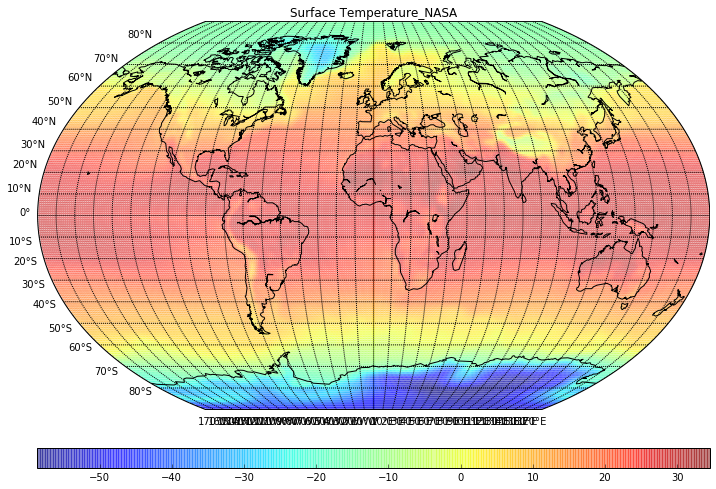

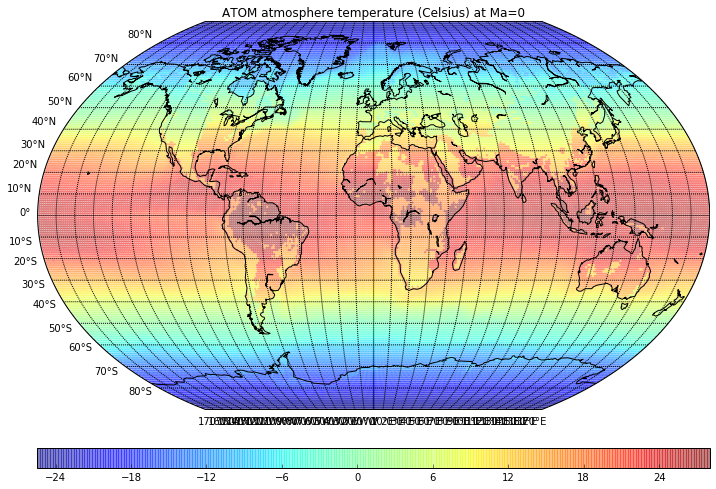

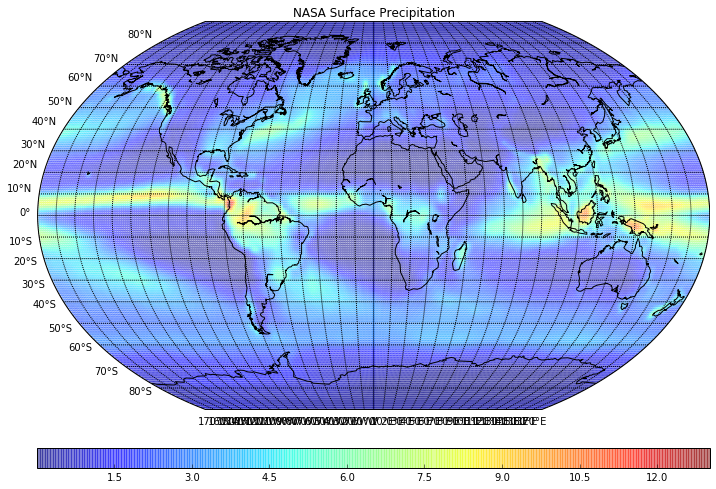

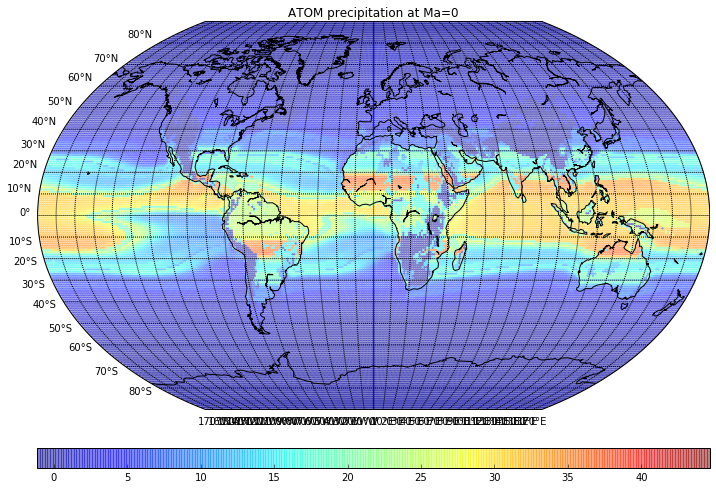

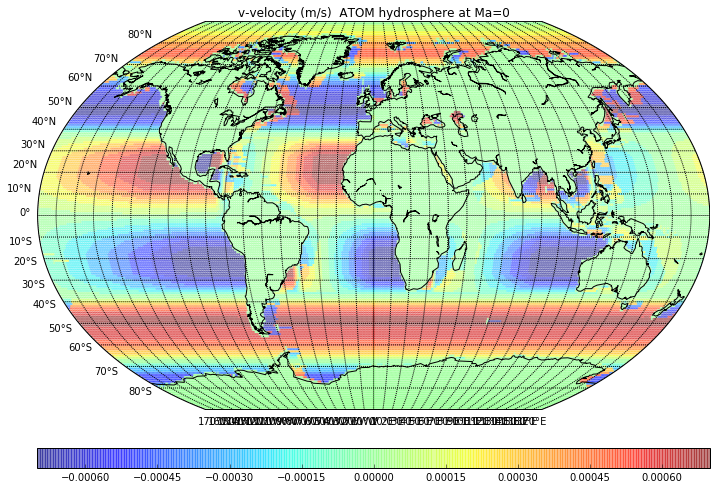

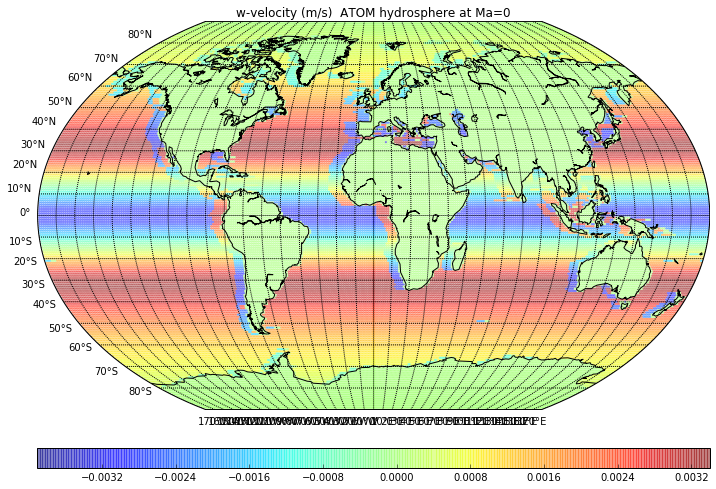

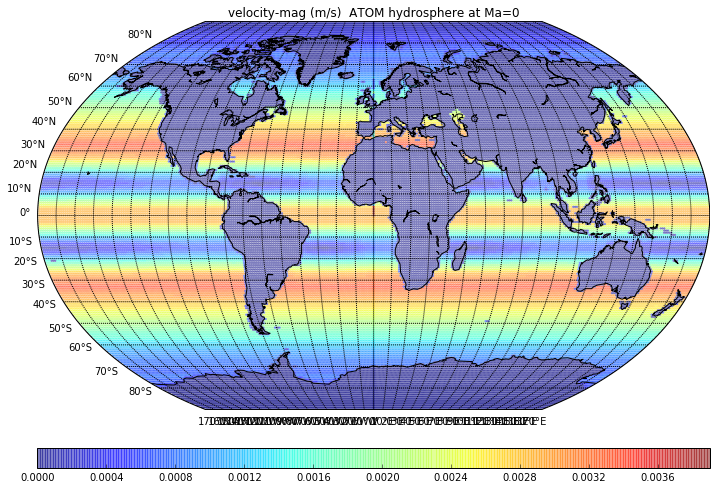

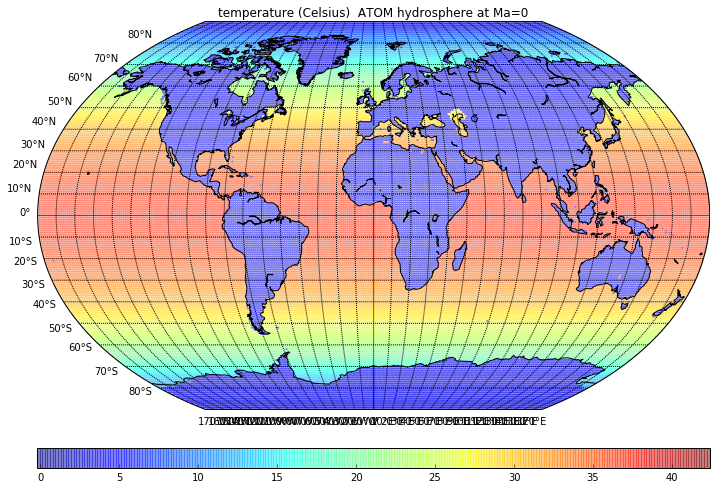

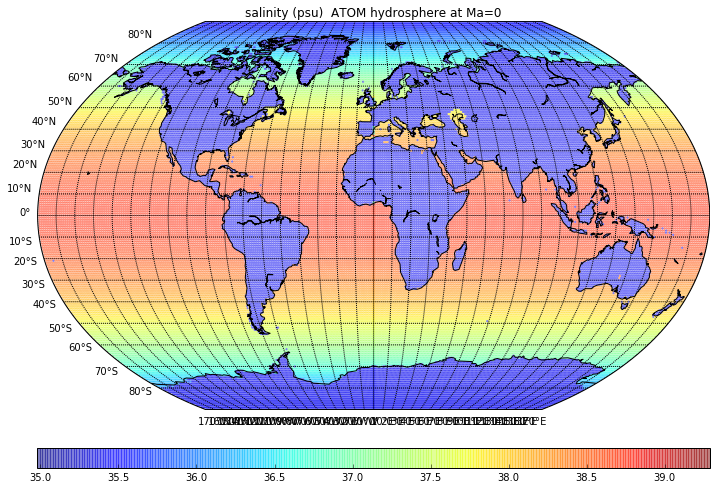

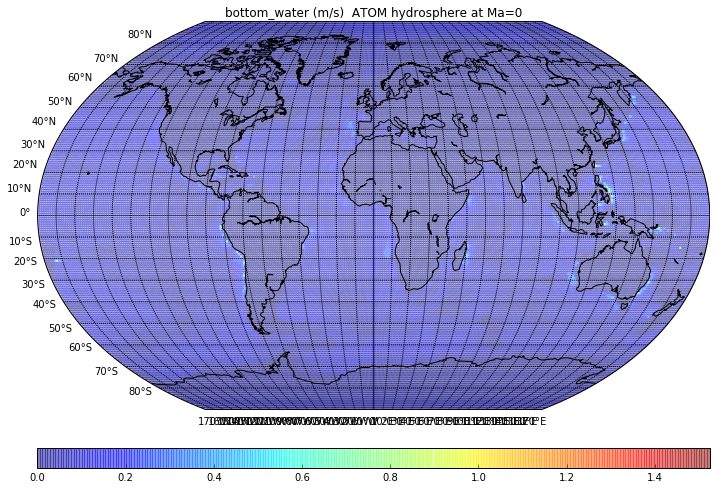

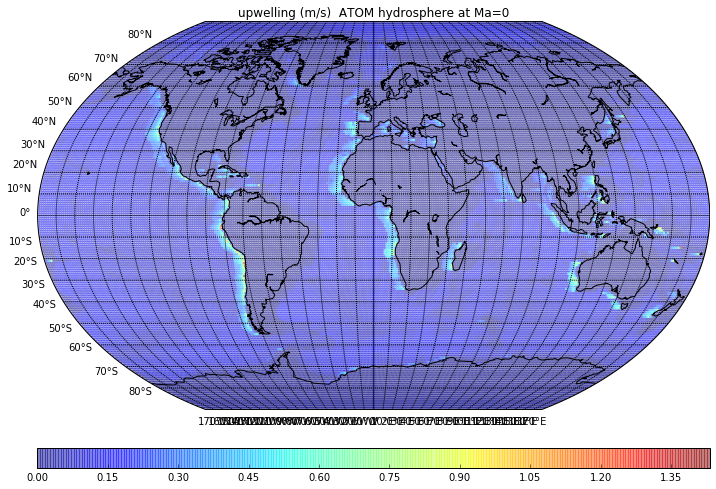

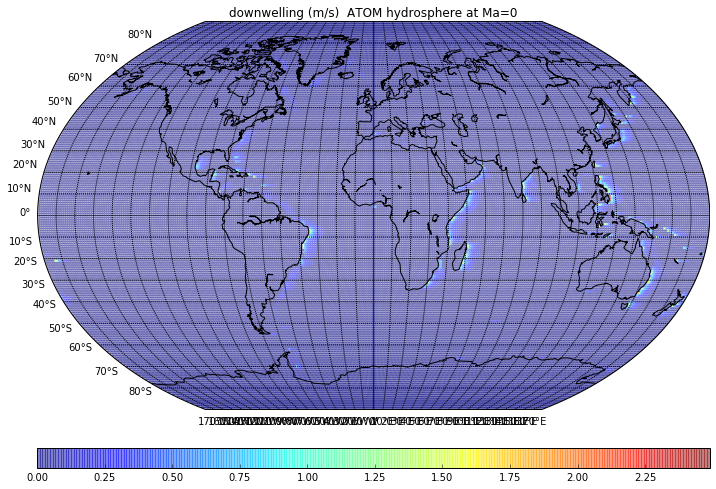

In [49]:
# running the plots chosen from the ATOM ouput data sets
import os.path
import numpy as np


# if "vel = True" surface velocity plots are shown:
vel = True
#vel = False

# if "temp_vap = True" surface temperature, water vapour, precipitation and precipitable water polts are shown:
temp_vap = True
#temp_vap = False

# if "temp_sal = True" surface temperature, and surface salinity polts are shown:
temp_sal = True
#temp_sal = False

# if "up_down = True" bottom water, upwelling and downwelling polts are shown:
up_down = True
#up_down = False

# if "temp_NASA = True" surface temperature by NASA and ATOM polts are shown:
temp_NASA = True
#temp_NASA = False

# if "prec_NASA = True" surface precipitation by NASA and ATOM polts are shown:
prec_NASA = True
#prec_NASA = False

# if "QuikSCAT = True" surface atmospheric velocities by QuikSCAT and ATOM polts are shown:
#QuikSCAT = True
QuikSCAT = False

# if "oscar_current = True" surface current velocities by OSCAR and ATOM polts are shown:
#oscar_current = True
oscar_cur = False




for t_s in time_slice:
    print 'time slice in        Ma = ', t_s

    Ma = t_s
    datapath = 'output-%s/' % Ma
    print 'name of the output path = ', datapath

    atm_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celcius)', 'water_vapour (g/kg)', 'precipitation (mm)', 'precipitable_water (mm)']
    hyd_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celsius)', 'salinity (psu)', 'bottom_water (m/s)', 'upwelling (m/s)', 'downwelling (m/s)']

    if a_h == 'atmosphere and hydrosphere':
        atm_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celcius)', 'water_vapour (g/kg)', 'precipitation (mm)', 'precipitable_water (mm)']
        hyd_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celsius)', 'salinity (psu)', 'bottom_water (m/s)', 'upwelling (m/s)', 'downwelling (m/s)']

        adata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Atm.xyz' % Ma), skiprows=1)
        hdata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Hyd.xyz' % Ma), skiprows=1)
        
        if vel == True:
            atm_out_velocities()
        if vel == True:
            atm_out_temp_vap()
        if vel == True:
            hyd_out_velocities()
        if vel == True:
            hyd_out_temp_sal()
        if vel == True:
            hyd_out_updownwelling()

    if a_h == 'atmosphere':
        atm_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celcius)', 'water_vapour (g/kg)', 'precipitation (mm)', 'precipitable_water (mm)']

        adata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Atm.xyz' % Ma), skiprows=1)
        
        if vel == True:
            atm_out_velocities()
        if temp_vap == True:
            atm_out_temp_vap()
        
    if Ma == 0:
        if temp_NASA == True:
            adata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Atm.xyz' % Ma), skiprows=1)
            temp_NASA_ATOM()
        if prec_NASA == True:
            prec_NASA_ATOM()
        if QuikSCAT == True:
            uas_QuikSCAT()
            vas_QuikSCAT()
            sfcWind_QuikSCAT()
            atm_out_velocities()

    if a_h == 'hydrosphere':
        hyd_header = ['lats (deg)', 'lons (deg)', 'topography', 'v-velocity (m/s)', 'w-velocity (m/s)', 'velocity-mag (m/s)', 'temperature (Celsius)', 'salinity (psu)', 'bottom_water (m/s)', 'upwelling (m/s)', 'downwelling (m/s)']

        hdata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Hyd.xyz' % Ma), skiprows=1)
        adata = np.loadtxt(os.path.join(datapath, '[%sMa_Golonka.xyz]_PlotData_Atm.xyz' % Ma), skiprows=1)

        if vel == True:
            hyd_out_velocities()
        if temp_sal == True:
            hyd_out_temp_sal()
        if up_down == True:
            hyd_out_updownwelling()
        if oscar_cur == True:
            oscar_current()
            hyd_out_velocities()
